In [2]:
import pandas as pd
import numpy as np
import csv

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

import math

In [3]:
# 폰트 파일의 경로 지정
font_path = r'C:\Windows\Fonts\gulim.ttc'

In [4]:
# matplotlib 패키지에 한글 폰트 설정
myFont = fm.FontProperties(fname = font_path).get_name()
mpl.rc('font', family = myFont)

In [5]:
# 한글 폰트 사용시 레이블의 '-' 기호 깨지는 현상 해결
plt.rc('axes', unicode_minus = False)  # plt.rcParams['axes.unicode_minus'] = False와 동일

In [6]:
file = '../DATA/gender.csv'

#### 연령별 성별 데이터 시각화 <hr>

- gender.csv 헤더 정보

In [7]:
f = open(file, encoding = 'utf-8-sig')
data = csv.reader(f)
header = next(data)

for i in range(len(header)):
    print(f'[{i:3d}] : {header[i]}', end = ', ')

    if (i+1) % 10 == 0:
        print()

f.close()

[  0] : 행정기관, [  1] : 총 인구수, [  2] : 연령구간인구수, [  3] : 0세, [  4] : 1세, [  5] : 2세, [  6] : 3세, [  7] : 4세, [  8] : 5세, [  9] : 6세, 
[ 10] : 7세, [ 11] : 8세, [ 12] : 9세, [ 13] : 10세, [ 14] : 11세, [ 15] : 12세, [ 16] : 13세, [ 17] : 14세, [ 18] : 15세, [ 19] : 16세, 
[ 20] : 17세, [ 21] : 18세, [ 22] : 19세, [ 23] : 20세, [ 24] : 21세, [ 25] : 22세, [ 26] : 23세, [ 27] : 24세, [ 28] : 25세, [ 29] : 26세, 
[ 30] : 27세, [ 31] : 28세, [ 32] : 29세, [ 33] : 30세, [ 34] : 31세, [ 35] : 32세, [ 36] : 33세, [ 37] : 34세, [ 38] : 35세, [ 39] : 36세, 
[ 40] : 37세, [ 41] : 38세, [ 42] : 39세, [ 43] : 40세, [ 44] : 41세, [ 45] : 42세, [ 46] : 43세, [ 47] : 44세, [ 48] : 45세, [ 49] : 46세, 
[ 50] : 47세, [ 51] : 48세, [ 52] : 49세, [ 53] : 50세, [ 54] : 51세, [ 55] : 52세, [ 56] : 53세, [ 57] : 54세, [ 58] : 55세, [ 59] : 56세, 
[ 60] : 57세, [ 61] : 58세, [ 62] : 59세, [ 63] : 60세, [ 64] : 61세, [ 65] : 62세, [ 66] : 63세, [ 67] : 64세, [ 68] : 65세, [ 69] : 66세, 
[ 70] : 67세, [ 71] : 68세, [ 72] : 69세, [ 73] : 70세, [ 74] : 71세, [ 75] : 72세, [ 76] : 

In [8]:
def print_population(population):
    '''
    특정 지역의 인구 현황을 화면에 출력함
    '''
    for i in range(len(population)):
        print(f'{i:3d}세 : {population[i]:4d}명', end = ' ')
        if (i + 1) % 10 == 0:
            print()
    print()

In [9]:
def drwa_gender_population(title, male_num_list, female_num_list):
    # barh(y축 범위, data)
    plt.barh(range(len(male_num_list)), male_num_list, label = '남성')
    plt.barh(range(len(female_num_list)), female_num_list, label = '여성')
    plt.title(title + ' 성별 인구 비율')
    plt.legend()
    plt.show()

In [10]:
def calculate_population():
    f = open(file, encoding = 'utf-8-sig')
    data = csv.reader(f)
    male_num_list = []
    female_num_list = []

    district = input('시군구 이름을 입력하세요 : ')
    for row in data:
        if district in row[0]:
            for male in row[106:207]:
                if ',' in male:
                    male = male.replace(',', '')
                male_num_list.append(int(male))
            
            for female in row[209:310]:
                if ',' in female:
                    female = female.replace(',', '')
                female_num_list.append(int(female))
            break
    f.close()

    print(f'남성 총 인구수 : {sum(male_num_list):,} ')
    print_population(male_num_list)
    print('----------------------------')
    print(f'여성 총 인구수 : {sum(female_num_list):,} ')
    print_population(female_num_list)
    drwa_gender_population(district, male_num_list, female_num_list)

calculate_population()

ValueError: invalid literal for int() with base 10: '0세'

남성 총 인구수 : -208,178 
  0세 : -822명   1세 : -933명   2세 : -994명   3세 : -1080명   4세 : -1230명   5세 : -1362명   6세 : -1445명   7세 : -1732명   8세 : -1894명   9세 : -1845명 
 10세 : -1807명  11세 : -2029명  12세 : -2007명  13세 : -1960명  14세 : -1830명  15세 : -2004명  16세 : -2170명  17세 : -2027명  18세 : -2020명  19세 : -2257명 
 20세 : -2469명  21세 : -2508명  22세 : -3004명  23세 : -3570명  24세 : -3410명  25세 : -3214명  26세 : -3103명  27세 : -2998명  28세 : -3004명  29세 : -2986명 
 30세 : -2939명  31세 : -2908명  32세 : -2781명  33세 : -2512명  34세 : -2650명  35세 : -2471명  36세 : -2442명  37세 : -2462명  38세 : -2486명  39세 : -2504명 
 40세 : -2683명  41세 : -3075명  42세 : -3113명  43세 : -3142명  44세 : -3167명  45세 : -2799명  46세 : -3082명  47세 : -3151명  48세 : -3282명  49세 : -3674명 
 50세 : -3753명  51세 : -3989명  52세 : -4079명  53세 : -4008명  54세 : -3932명  55세 : -4263명  56세 : -3727명  57세 : -3654명  58세 : -3423명  59세 : -3358명 
 60세 : -3177명  61세 : -3648명  62세 : -3620명  63세 : -3465명  64세 : -3279명  65세 : -2841명  66세 : -2891명  67세 : -2419명  68세 : -2332명  69세 : -20

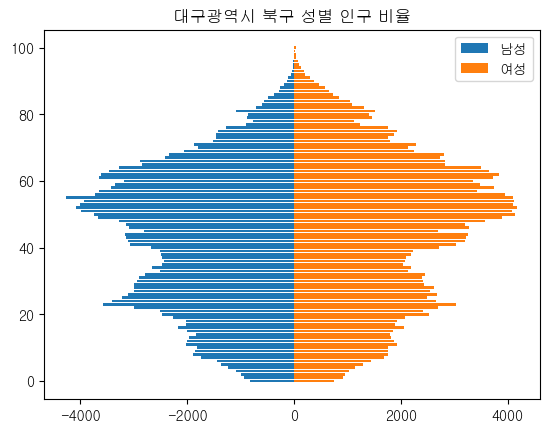

In [ ]:
def calculate_population():
    f = open(file, encoding = 'utf-8-sig')
    data = csv.reader(f)
    male_num_list = []
    female_num_list = []

    district = input('시군구 이름을 입력하세요 : ')
    for row in data:
        if district in row[0]:
            for male in row[106:207]:
                if ',' in male:
                    male = male.replace(',', '')
                male_num_list.append(-int(male))
            
            for female in row[209:310]:
                if ',' in female:
                    female = female.replace(',', '')
                female_num_list.append(int(female))
            break
    f.close()

    print(f'남성 총 인구수 : {sum(male_num_list):,} ')
    print_population(male_num_list)
    print('----------------------------')
    print(f'여성 총 인구수 : {sum(female_num_list):,} ')
    print_population(female_num_list)
    drwa_gender_population(district, male_num_list, female_num_list)

calculate_population()

#### 특정 지역의 남녀 인구 비율 예제 <hr>

제주특별자치도 남자 인구수 : 337,976명, 여자 인구수 : 337,276명


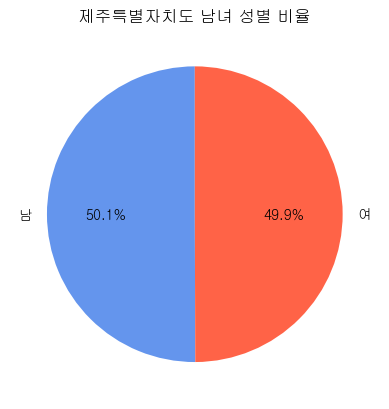

In [ ]:
f = open(file, encoding = 'utf-8-sig')
data = csv.reader(f)
population = []
city = input('찾고 싶은 지역의 이름을 입력하세요 : ')
male_count = 0
female_count = 0

for row in data:
    if city in row[0]:
        male_count = int(row[104].replace(',', ''))  # 자리수 문자열 제거 및 숫자로 변환
        female_count = int(row[207].replace(',', ''))
        break  # 도시별 하위 목록이 많음, 처음에 나오는 데이터가 전체 총합

print(f'{city} 남자 인구수 : {male_count:,}명, 여자 인구수 : {female_count:,}명')

population = [male_count, female_count]
color = ['cornflowerblue', 'tomato']
plt.pie(population, labels = ['남', '여'], autopct = '%.1f%%', colors = color, startangle = 90)
plt.title(city + ' 남녀 성별 비율')
plt.show()

#### 서울특별시 및 5대 광역시 연령대별 남녀 인구수 비교 <hr>

In [ ]:
f = open(file, encoding = 'utf-8-sig')
data = csv.reader(f)
city_list = ['서울특별시', '부산광역시', '대구광역시', '인천광역시', '대전광역시']
for city in city_list:
    male_list = []
    female_list = []
    for row in data:
        if city in row[0]:
            for i in range(106, 207):
                male_list.append(int(row[i].replace(',','')))
                female_list.append(int(row[i+103].replace(',','')))
            break

    color = ['cornflowerblue', 'tomato']
    plt.plot(male_list, label = '남성', color = color[0])
    plt.plot(female_list, label = '여성', color = color[1])
    plt.title(city + ' 남녀 인구수 비교')
    plt.xlabel('나이')
    plt.ylabel('인구수')
    plt.legend()
    plt.savefig('img/' + city + '.png', dpi = 100)
    plt.close()

NameError: name 'file' is not defined

- 산점도에 color bar 추가하기

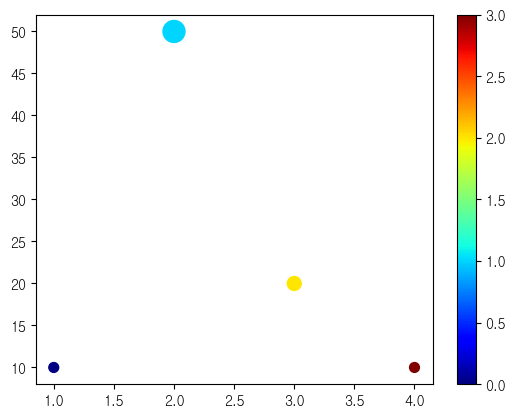

In [ ]:
y_value = [10, 50, 20, 10]
x_value = [1, 2, 3, 4]
size = []
for y in y_value:
    size.append(y * 5)

plt.scatter(x_value, y_value, s = size, c = range(4), cmap = 'jet')
plt.colorbar()
plt.show()

#### 제주도의 연령대별 성별 비율 산점도 <hr>

In [ ]:
def draw_scatter(city, male_list, female_list, bubble_size_list):
    plt.figure(figsize = (8, 4), dpi = 100)
    plt.scatter(male_list, female_list, s = bubble_size_list, c = range(101), alpha = 0.5, cmap = 'jet')
    plt.colorbar()
    plt.plot(range(max(male_list)), range(max(male_list)), 'g--')  # 추세선 추가 (녹색 점선)

    plt.title(city + ' 지역의 남녀 인구수 비교')
    plt.xlabel('남성 인구 수')
    plt.ylabel('여성 인구 수')
    plt.show()

[여성 인구] : [1585, 1776, 1907, 1996, 2405, 2544, 2806, 3172, 3365, 3461, 3449, 3840, 3601, 3527, 3358, 3392, 3584, 3229, 3016, 3005, 3072, 2842, 3235, 3701, 3327, 3320, 3690, 3666, 3852, 3884, 4006, 3984, 3980, 3499, 3540, 3585, 3695, 3745, 4139, 4381, 5001, 5672, 5660, 5596, 5858, 4642, 5255, 4871, 5211, 5623, 5972, 6110, 6426, 5990, 5883, 5917, 5433, 5236, 5112, 5116, 5288, 5170, 5379, 5303, 5013, 4528, 4423, 4166, 4294, 3465, 2926, 3069, 2540, 2664, 2601, 2717, 2727, 2416, 2062, 2166, 2109, 2251, 2113, 1880, 1881, 1726, 1528, 1366, 1238, 1176, 1075, 813, 578, 496, 418, 251, 196, 108, 87, 46, 278]
[남성 인구] : [1599, 1868, 2003, 2208, 2439, 2692, 3005, 3361, 3655, 3556, 3566, 3977, 3838, 3798, 3556, 3592, 3786, 3531, 3409, 3415, 3557, 3672, 3816, 4132, 3816, 3848, 3948, 4091, 4225, 4343, 4288, 4416, 4038, 3793, 3537, 3560, 3646, 3857, 4149, 4329, 4872, 5692, 5729, 5707, 5703, 4917, 5420, 5462, 5538, 6291, 6231, 6436, 6852, 6444, 6358, 6254, 5797, 5921, 5576, 5423, 5630, 5345, 5345, 5410, 

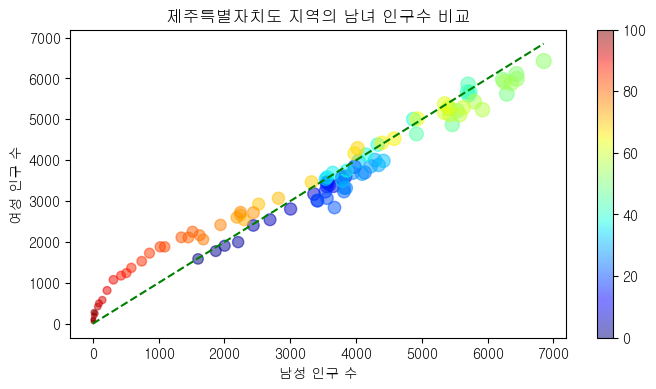

In [ ]:
def calculate_population():
    f = open(file, encoding = 'utf-8-sig')
    data = csv.reader(f)
    male_list = []
    female_list = []
    bubble_size_list = []
    city = input('찾고 싶은 지역의 이름을 입력하세요 : ')
    
    for row in data:
        if city in row[0]:
            for i in range(106, 207):
                male_num =  int(row[i].replace(',', ''))
                female_num = int(row[i + 103].replace(',', ''))
                # 버블의 사이즈 조절
                bubble_size_list.append(math.sqrt(male_num + female_num))
                # bubble_size_list.append(math.log(pow(male_num, 2) + pow(female_num, 2)))
                male_list.append(male_num)
                female_list.append(female_num)
            break
    
    f.close()
    print(f'[여성 인구] : {female_list}')
    print(f'[남성 인구] : {male_list}')
    draw_scatter(city, male_list, female_list, bubble_size_list)

calculate_population()